
# **Bank Client Subscription Prediction 📊**

---


**Importing Libraries**

In [1]:
# Standard library imports
import os
import warnings

# Data manipulation and processing
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

# Model evaluation
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
)

# Data splitting
from sklearn.model_selection import train_test_split

# Tabular display
from tabulate import tabulate

# Suppress warnings
warnings.filterwarnings("ignore")

# GUI
import ipywidgets as widgets
from IPython.display import display, clear_output

**Loading Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

google_drive_folder = "/content/drive/My Drive/ML CW/Data"

# file paths
file_name = os.path.join(google_drive_folder, "bank-additional-full.csv")
output_file = os.path.join(google_drive_folder, "processed1_file.csv")

# Checking if the file exists in the current directory
if os.path.isfile(file_name):
    print(f"'{file_name}' found. Loading file...")

    # Loading the CSV file
    data = pd.read_csv(file_name, header=None)

    # Checking the first few rows to confirm the data format
    print("Raw data preview:")
    print(data.head())

else:
    print(f"Error: '{file_name}' not found in the current directory.")


Mounted at /content/drive
'/content/drive/My Drive/ML CW/Data/bank-additional-full.csv' found. Loading file...
Raw data preview:
                                                   0
0  age;"job";"marital";"education";"default";"hou...
1  56;"housemaid";"married";"basic.4y";"no";"no";...
2  57;"services";"married";"high.school";"unknown...
3  37;"services";"married";"high.school";"no";"ye...
4  40;"admin.";"married";"basic.6y";"no";"no";"no...


**Structuring**

In [3]:
# Splitting the single column into multiple columns based on semicolons
data_split = data[0].str.split(';', expand=True)

# Removing double quotes from string values
data_cleaned = data_split.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)

# Display the cleaned data
print("\nStructured data preview:")
print(tabulate(data_cleaned.head(31), headers='keys', tablefmt='grid'))


Structured data preview:
+----+-----+---------------+----------+---------------------+---------+---------+---------+-----------+-------+-------------+----------+----------+-------+----------+-------------+--------------+----------------+---------------+-----------+-------------+------+
|    | 0   | 1             | 2        | 3                   | 4       | 5       | 6       | 7         | 8     | 9           | 10       | 11       | 12    | 13       | 14          | 15           | 16             | 17            | 18        | 19          | 20   |
+====+=====+===============+==========+=====================+=========+=========+=========+===========+=======+=============+==========+==========+=======+==========+=============+==============+================+===============+===========+=============+======+
|  0 | age | job           | marital  | education           | default | housing | loan    | contact   | month | day_of_week | duration | campaign | pdays | previous | poutcome    | emp.var

**Row Shuffling**

In [4]:
# Separate the first two rows
first_two_rows = data_cleaned.iloc[:2]

# Shuffle the rest of the rows
shuffled_rest = data_cleaned.iloc[2:].sample(frac=1, random_state=42).reset_index(drop=True)

# Concatenate the fixed rows with the shuffled rows
data_shuffled = pd.concat([first_two_rows, shuffled_rest], ignore_index=True)

# Display the shuffled data
print("\nShuffled data preview:")
print(data_shuffled.head())


Shuffled data preview:
    0              1        2                  3        4        5     6   \
0  age            job  marital          education  default  housing  loan   
1   56      housemaid  married           basic.4y       no       no    no   
2   34     technician   single  university.degree       no      yes    no   
3   36     management  married  university.degree       no      yes    no   
4   42  self-employed  married  university.degree       no       no    no   

          7      8            9   ...        11     12        13           14  \
0    contact  month  day_of_week  ...  campaign  pdays  previous     poutcome   
1  telephone    may          mon  ...         1    999         0  nonexistent   
2   cellular    aug          thu  ...         3    999         0  nonexistent   
3   cellular    nov          wed  ...         2    999         0  nonexistent   
4  telephone    may          fri  ...         2    999         0  nonexistent   

             15           

**Eliminating 'unknown' values**

In [5]:
# Replacing 'unknown' with NaN in the entire dataframe
data_shuffled.replace('unknown', pd.NA, inplace=True)

# Displaying the cleaned data
print(data_shuffled.head())

# Save the processed dataset to Google Drive
data_shuffled.to_csv(output_file, index=False)
print(f"\nShuffled and cleaned data saved to: {output_file}")

    0              1        2                  3        4        5     6   \
0  age            job  marital          education  default  housing  loan   
1   56      housemaid  married           basic.4y       no       no    no   
2   34     technician   single  university.degree       no      yes    no   
3   36     management  married  university.degree       no      yes    no   
4   42  self-employed  married  university.degree       no       no    no   

          7      8            9   ...        11     12        13           14  \
0    contact  month  day_of_week  ...  campaign  pdays  previous     poutcome   
1  telephone    may          mon  ...         1    999         0  nonexistent   
2   cellular    aug          thu  ...         3    999         0  nonexistent   
3   cellular    nov          wed  ...         2    999         0  nonexistent   
4  telephone    may          fri  ...         2    999         0  nonexistent   

             15              16             17    

**Data Exploration - overview**

In [6]:
# Check basic data information
print("="*50)
print("Basic Data Information")
print("="*50)

# Data types and missing values
print("\n[1] Data Types and Missing Values:")
print(data.info())  # Check for data types and missing values
print("-"*50)

# Summary statistics
print("\n[2] Summary Statistics:")
print(data.describe().to_string())  # Convert to string for neat formatting
print("-"*50)

# Check for missing values
print("\n[3] Missing Values:")
missing_values = data.isnull().sum()
print(missing_values.to_string())  # Convert to string for cleaner output
print("-"*50)

# Check for duplicates
duplicates = data.duplicated().sum()
print("\n[4] Duplicate Rows:")
print(f"{duplicates} duplicate rows found.")
print("="*50)

Basic Data Information

[1] Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41189 entries, 0 to 41188
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       41189 non-null  object
dtypes: object(1)
memory usage: 321.9+ KB
None
--------------------------------------------------

[2] Summary Statistics:
                                                                                                                                                   0
count                                                                                                                                          41189
unique                                                                                                                                         41177
top     55;"services";"married";"high.school";"unknown";"no";"no";"cellular";"aug";"mon";33;1;999;0;"nonexistent";1.4;93.444;-36.1;4.965;5228.1;"no"
freq  

**Understanding missing values**

In [7]:
cleaned_data_path = os.path.join(google_drive_folder, "processed1_file.csv")

# Reading the CSV file, treating the second row as column headers
cleaned_data = pd.read_csv(cleaned_data_path, header=1)  # header=1 as the first row is column number

# Replace 999 in 'pdays' column with 0
cleaned_data['pdays'] = cleaned_data['pdays'].replace(999, 0)

# Checking the column names
print("Column Names:")
print(cleaned_data.columns)

# Function to identify missing values in a column
def identify_missing_values(df, column_name):
    missing_values_count = df[column_name].isna().sum()  # Counts NaN values
    blank_values_count = (df[column_name] == '').sum()  # Counts blank strings

    print(f"Missing values (NaN) in column '{column_name}': {missing_values_count}")
    print(f"Blank values in column '{column_name}': {blank_values_count}")
    return missing_values_count, blank_values_count

# List of columns to check - all columns
columns = [
    "age", "job", "marital", "education", "default", "housing", "loan", "contact",
    "month", "day_of_week", "duration", "campaign", "pdays", "previous", "poutcome",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"
]

# Checking missing values for each column
for column in columns:
    identify_missing_values(cleaned_data, column)

data=cleaned_data

Column Names:
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
Missing values (NaN) in column 'age': 0
Blank values in column 'age': 0
Missing values (NaN) in column 'job': 330
Blank values in column 'job': 0
Missing values (NaN) in column 'marital': 80
Blank values in column 'marital': 0
Missing values (NaN) in column 'education': 1731
Blank values in column 'education': 0
Missing values (NaN) in column 'default': 8597
Blank values in column 'default': 0
Missing values (NaN) in column 'housing': 990
Blank values in column 'housing': 0
Missing values (NaN) in column 'loan': 990
Blank values in column 'loan': 0
Missing values (NaN) in column 'contact': 0
Blank values in column 'contact': 0
Missing values (NaN) in column 'month': 0
Blank values i

**Handling missing values**

In [8]:
# Columns with missing values
columns_with_missing = ["job", "marital", "education", "default", "housing", "loan"]

#print the count of each different value in the specified columns
for column in columns_with_missing:
    value_counts = data[column].value_counts()
    print(f"Value counts for column '{column}':")
    print(value_counts)
    print()

# Function to replace missing values with the suitable value
def fill_missing_with_mode(df, columns):
    for column in columns:
        mode_value = df[column].mode()[0]  # Calculating the mode
        df[column].fillna(mode_value, inplace=True)  # Filling the missing values
        print(f"Filled missing values in '{column}' with '{mode_value}'")

# Filling missing values in the specified columns individually
fill_missing_with_mode(data, columns_with_missing)

# Checking for duplicate rows
duplicate_rows = data[data.duplicated()]

# Removing duplicate rows
#data = data.drop_duplicates()
# Printing information about removed duplicates
#print("Number of duplicate rows removed:", len(duplicate_rows))

# Commented the removing duplicates above as there is no unique ID to say that they are duplicates and not seperate common cases.

# Saving the updated data
output_path = os.path.join(google_drive_folder, "processed2_file.csv")
data.to_csv(output_path, index=False)

print("Missing values have been handled. The updated data is saved.")


Value counts for column 'job':
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

Value counts for column 'marital':
marital
married     24928
single      11568
divorced     4612
Name: count, dtype: int64

Value counts for column 'education':
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64

Value counts for column 'default':
default
no     32588
yes        3
Name: count, dtype: int64

Value counts for column 'housing':
housing
yes    21576
no     18622
Name: count, dtype: int64

Value counts for column 'loan':
loan
no     33950
yes     6248
Name: count, dtype: int64

Fi

**Plotting each feature**

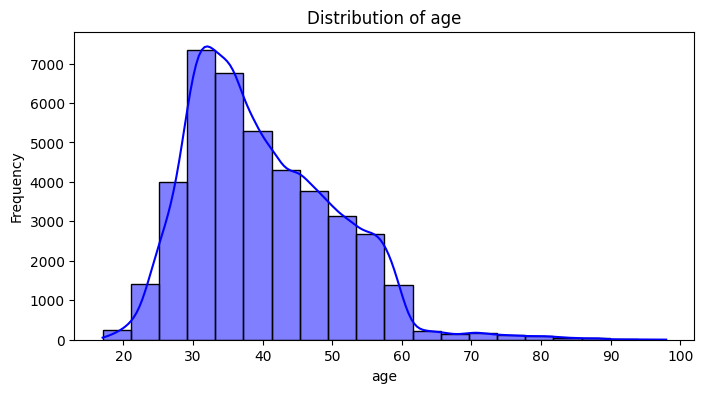

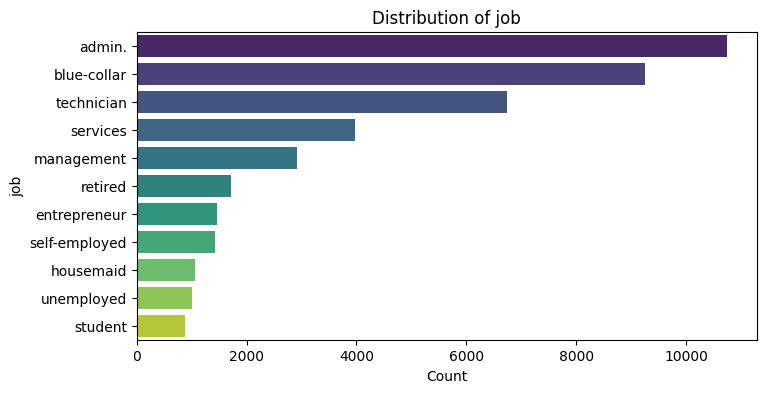

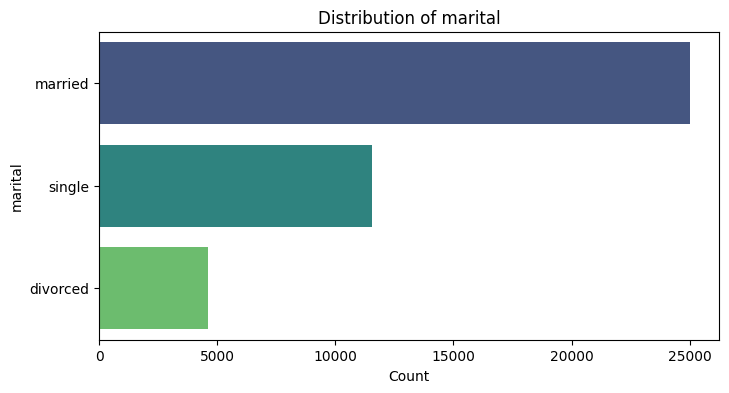

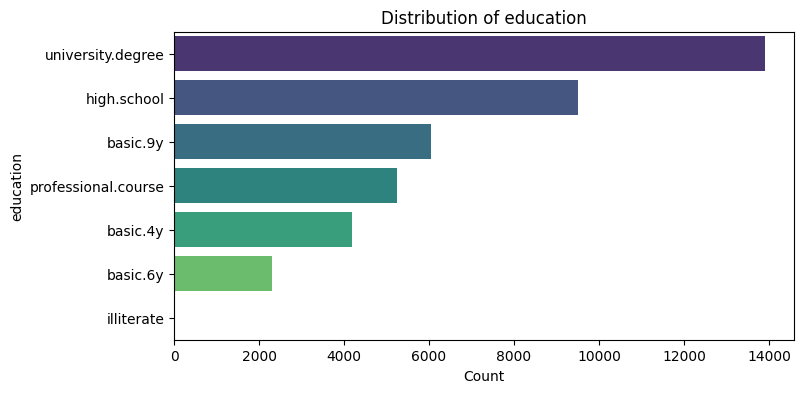

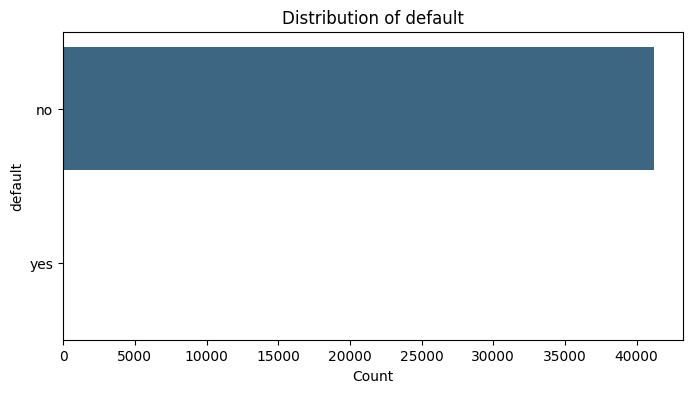

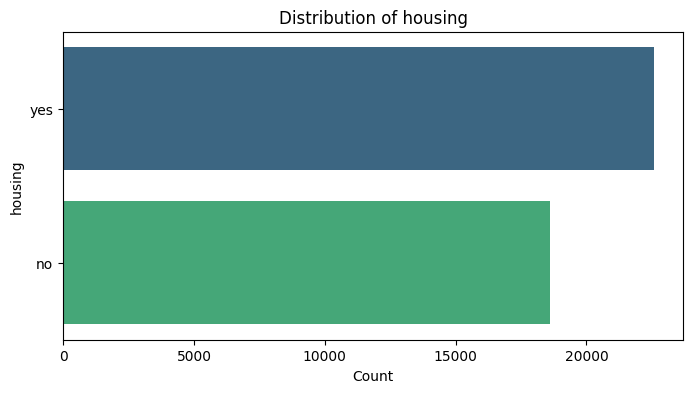

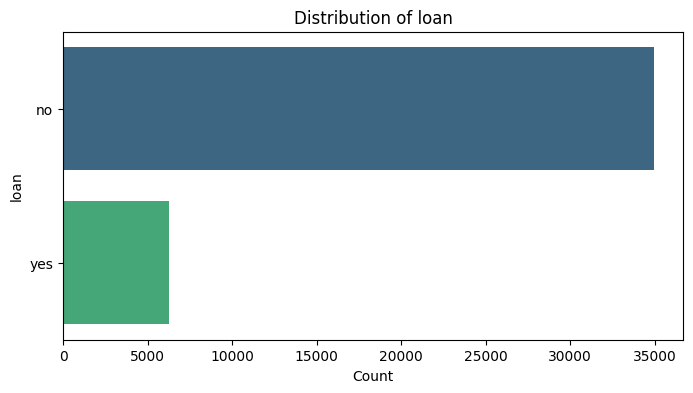

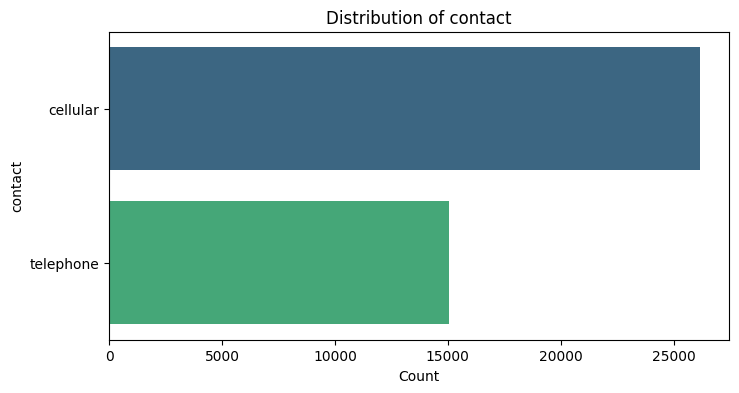

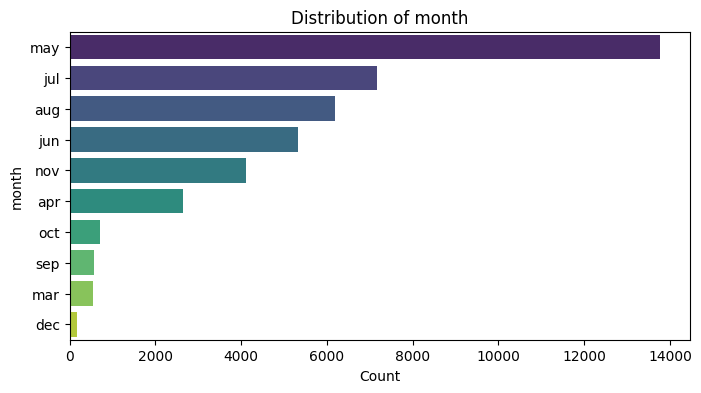

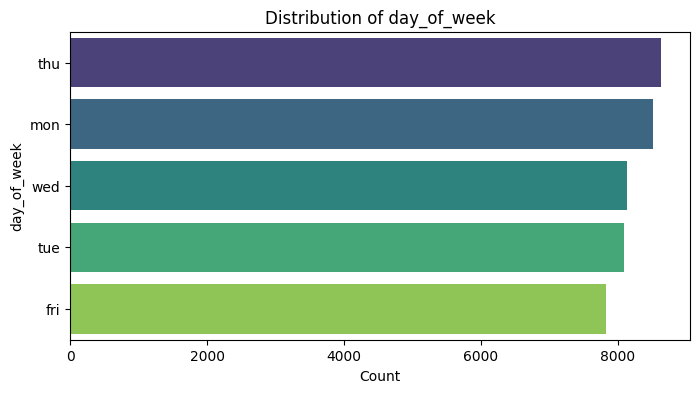

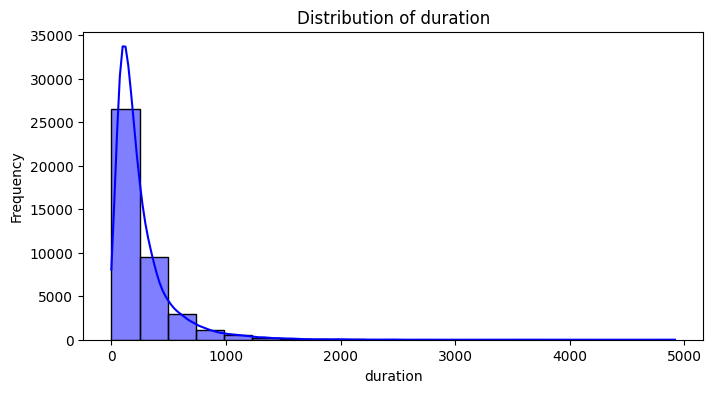

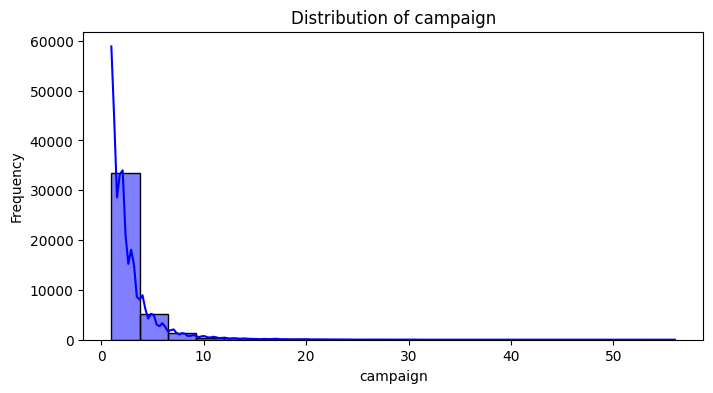

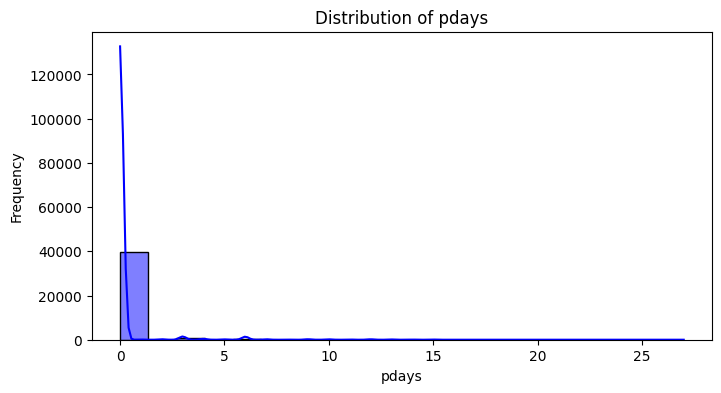

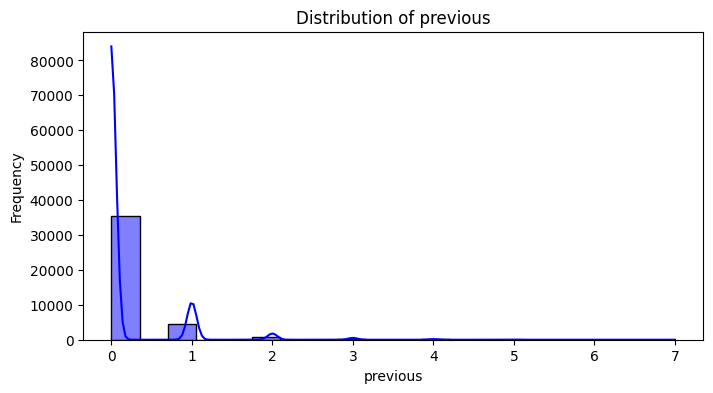

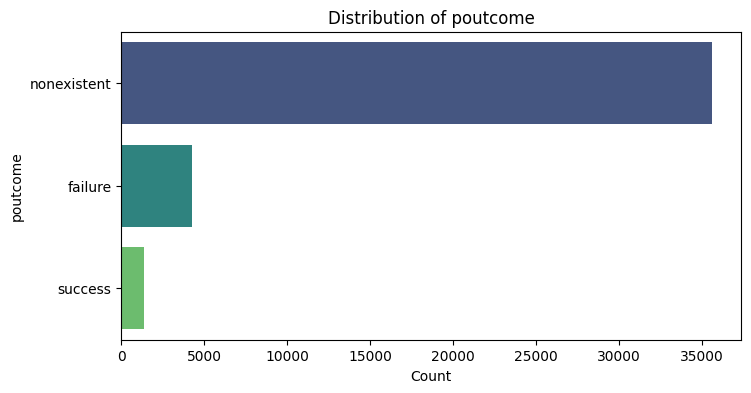

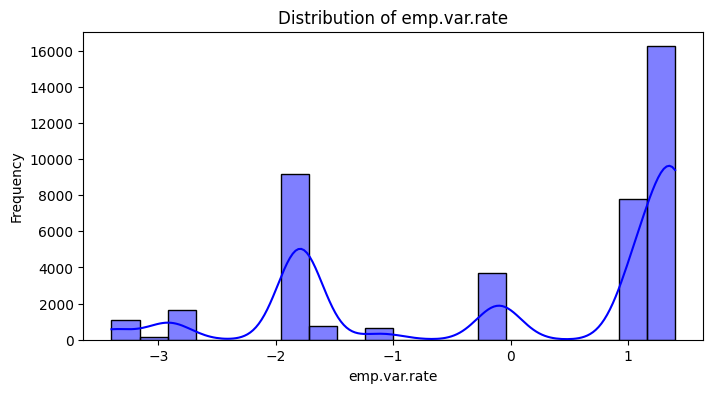

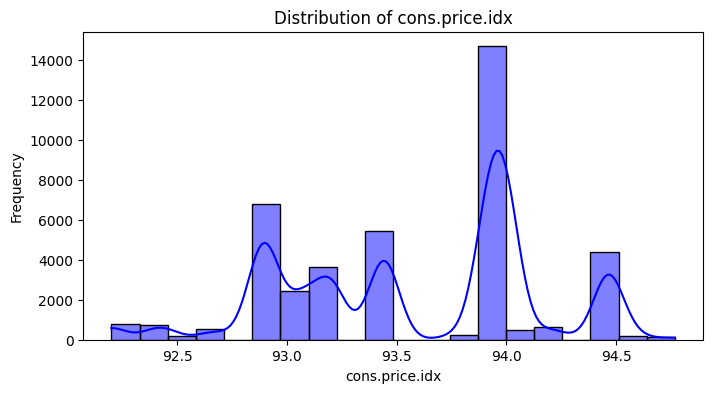

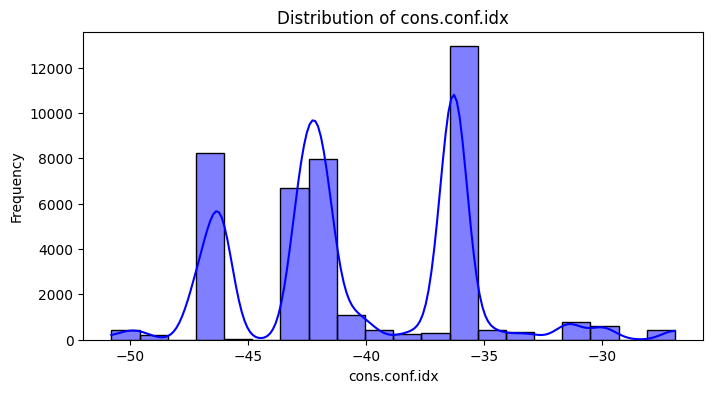

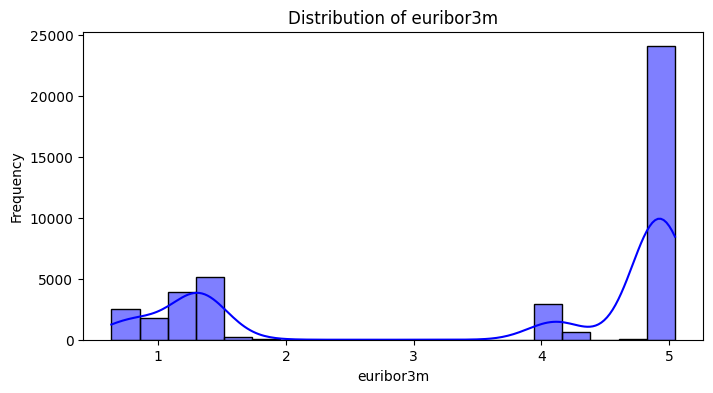

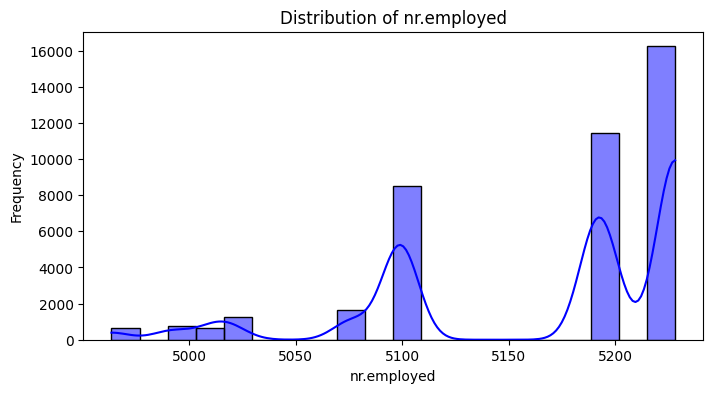

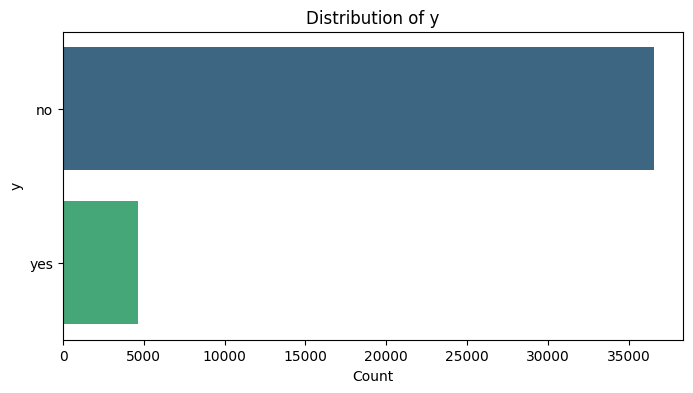

In [9]:
# Load the cleaned dataset
data_path = os.path.join(google_drive_folder, "processed2_file.csv")
cleaned_data = pd.read_csv(data_path, header=0)  # Ensure the first row is the header

import matplotlib.pyplot as plt
import seaborn as sns

# function to create combined plots for all columns
def plot_all_features(cleaned_data):
    for col in cleaned_data.columns:  # Reference the correct DataFrame
        if cleaned_data[col].dtype in ['object', 'category']:
            # Bar plot for categorical features
            plt.figure(figsize=(8, 4))
            sns.countplot(y=cleaned_data[col], order=cleaned_data[col].value_counts().index, palette='viridis')
            plt.title(f"Distribution of {col}")
            plt.xlabel("Count")
            plt.ylabel(col)
            plt.show()
        else:
            # Histogram for numerical features
            plt.figure(figsize=(8, 4))
            sns.histplot(cleaned_data[col], kde=True, bins=20, color='blue', edgecolor='black')
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.show()

# Call the function to plot all features
plot_all_features(cleaned_data)


**Encoding**

In [10]:
# Initialize LabelEncoder
le = LabelEncoder()

# Custom order definitions
custom_orders = {
    "job": [
        "student", "housemaid", "blue-collar", "services", "admin.", "technician",
        "self-employed", "entrepreneur", "management", "retired", "unemployed"
    ],
    "marital": ["single", "married", "divorced"],
    "education": [
        "illiterate", "basic.4y", "basic.6y", "basic.9y", "high.school",
        "professional.course", "university.degree"
    ],
    "default": ["yes", "no"],
    "housing": ["no", "yes"],
    "loan": ["no", "yes"],
    "contact": ["cellular", "telephone"],
    "month": ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    "day_of_week": ["mon", "tue", "wed", "thu", "fri"],
    "poutcome": ["nonexistent", "failure", "success"],
    "y": ["no", "yes"]
}

# Dictionary to store class mappings
label_encodings = {}

# Encode each column based on the custom order
for column, order in custom_orders.items():
    data[column] = pd.Categorical(data[column], categories=order, ordered=True).codes
    label_encodings[column] = {value: idx for idx, value in enumerate(order)}


# Convert columns to float
cols_to_convert = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
data[cols_to_convert] = data[cols_to_convert].astype('float64')

# Check the results
print("Encoded Data:")
print(data.head())

print("\nClass Mappings:")
for col, mapping in label_encodings.items():
    print(f"{col}: {mapping}")

old_numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Save the updated data
output_path = os.path.join(google_drive_folder, "processed3_file.csv")
data.to_csv(output_path, index=False)


Encoded Data:
   age  job  marital  education  default  housing  loan  contact  month  \
0   56    1        1          1        1        0     0        1      4   
1   34    5        0          6        1        1     0        0      7   
2   36    8        1          6        1        1     0        0     10   
3   42    6        1          6        1        0     0        1      4   
4   33    2        1          1        1        1     0        1      5   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         1      0         0         0           1.1   
1            3  ...         3      0         0         0           1.4   
2            2  ...         2      0         0         0          -0.1   
3            4  ...         2      0         0         0           1.1   
4            4  ...         7      0         0         0           1.4   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -

**Checking data types**

In [11]:
column_data_types = data.dtypes
print(column_data_types)

age                 int64
job                  int8
marital              int8
education            int8
default              int8
housing              int8
loan                 int8
contact              int8
month                int8
day_of_week          int8
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome             int8
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                    int8
dtype: object


**Outlier handling**

In [12]:
# Define the numerical columns for your dataset
numerical_columns = ['age', 'duration', 'campaign', 'emp.var.rate', 'previous', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Define a function to handle outliers using IQR method
def handle_outliers_with_iqr(column):
    # Calculate quartiles
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count occurrences of outliers
    outliers = (column < lower_bound) | (column > upper_bound)
    outlier_count = outliers.sum()

    # Provide detailed feedback based on outlier count
    if outlier_count == 0:
        print(f"No outliers detected in column '{column.name}'.")
    elif outlier_count < 400:
        print(f"Column '{column.name}' has {outlier_count} outliers, which is below the threshold.")
        # Drop rows containing outliers
        column = column[~outliers]
    else:
        print(f"Column '{column.name}' has {outlier_count} outliers, which exceeds the threshold.")
        # Apply capping to outliers
        column = column.apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    return column

for column in numerical_columns:
    data[column] = handle_outliers_with_iqr(data[column])  # Update the DataFrame in place


Column 'age' has 469 outliers, which exceeds the threshold.
Column 'duration' has 2963 outliers, which exceeds the threshold.
Column 'campaign' has 2406 outliers, which exceeds the threshold.
No outliers detected in column 'emp.var.rate'.
Column 'previous' has 5625 outliers, which exceeds the threshold.
Column 'pdays' has 1500 outliers, which exceeds the threshold.
No outliers detected in column 'cons.price.idx'.
Column 'cons.conf.idx' has 447 outliers, which exceeds the threshold.
No outliers detected in column 'euribor3m'.
No outliers detected in column 'nr.employed'.


**Correlations**

In [13]:
# Calculate correlations with the target variable ('y')
correlations = data.corr()['y'].sort_values(ascending=False)

# Print correlations
print(correlations)

y                 1.000000
duration          0.401286
poutcome          0.270373
education         0.055175
cons.conf.idx     0.054789
job               0.049602
month             0.037187
age               0.020941
housing           0.011085
day_of_week       0.010051
default           0.003041
loan             -0.004466
marital          -0.045849
campaign         -0.069400
cons.price.idx   -0.136211
contact          -0.144773
emp.var.rate     -0.298334
euribor3m        -0.307771
nr.employed      -0.354678
pdays                  NaN
previous               NaN
Name: y, dtype: float64


**Feature Importance - RF**

In [14]:
#Deciding on which features to drop

# Define feature matrix (X) and target variable (y)
X = data.drop(columns=['y'])
y = data['y']

# Train Random Forest
model = RandomForestClassifier()
model.fit(X, y)

# Display feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))


           Feature    Importance
10        duration  2.970056e-01
18       euribor3m  1.124187e-01
0              age  1.078719e-01
19     nr.employed  6.945664e-02
1              job  6.002380e-02
14        poutcome  4.830523e-02
11        campaign  4.579702e-02
9      day_of_week  4.528303e-02
3        education  4.492196e-02
17   cons.conf.idx  2.732882e-02
2          marital  2.709928e-02
15    emp.var.rate  2.400656e-02
16  cons.price.idx  2.233448e-02
5          housing  2.179988e-02
8            month  2.080930e-02
6             loan  1.452062e-02
7          contact  1.101628e-02
4          default  7.750544e-07
12           pdays  0.000000e+00
13        previous  0.000000e+00


**Visualization : Feature Importance - RF**

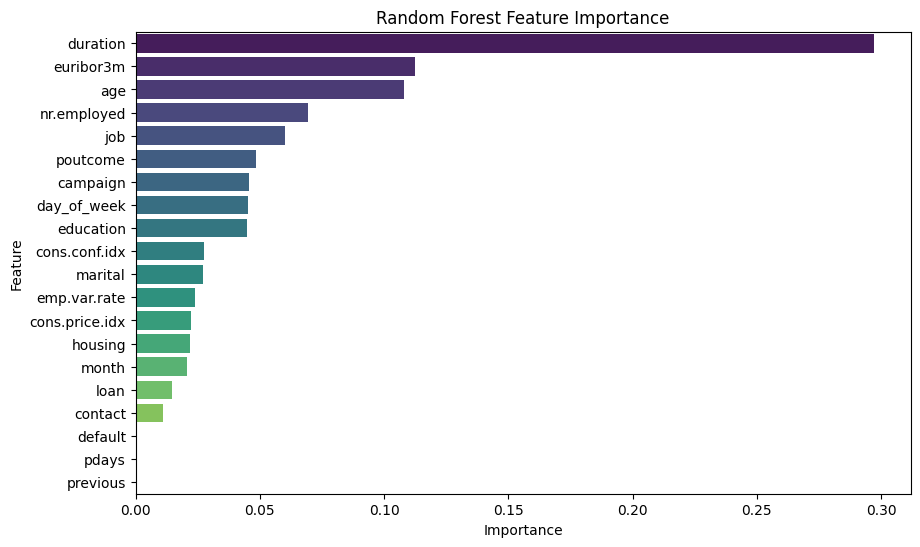

In [15]:
# Get feature importances from the Random Forest model
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()


**Heatmap**

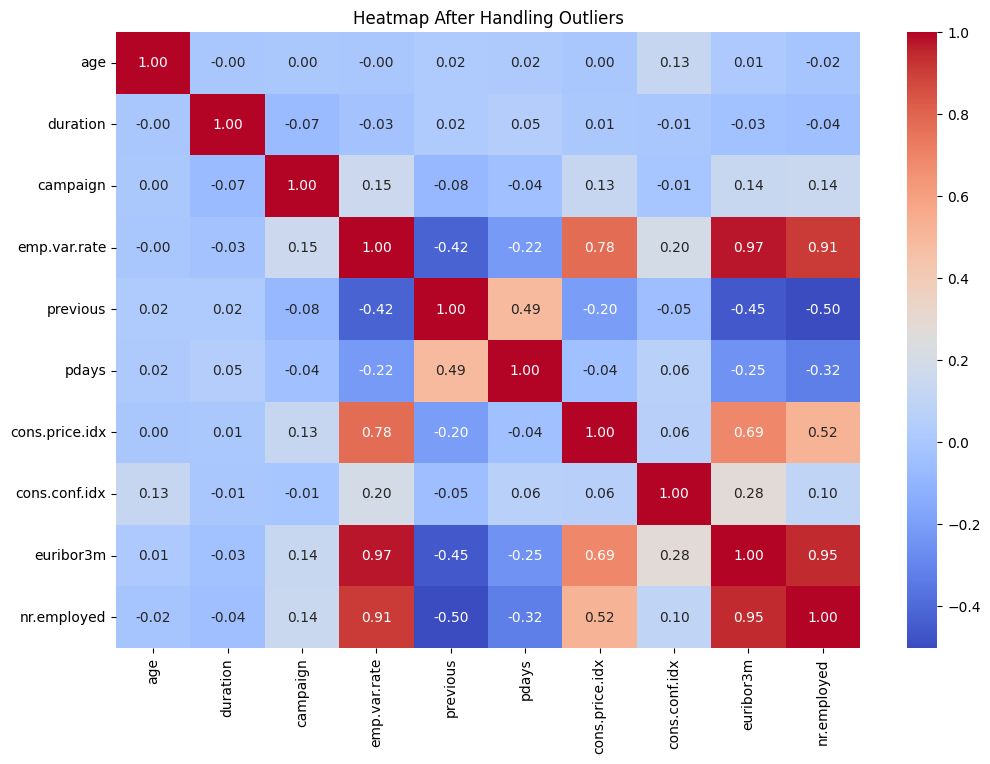

In [16]:
# Extract the columns into DataFrames
numerical_data = cleaned_data[numerical_columns]

# Heatmap after handling outliers
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap After Handling Outliers")
plt.show()


**Dropping Columns**

In [17]:
columns_to_drop = ['default', 'loan', 'day_of_week', 'housing','pdays','previous']
data_filtered = data.drop(columns=columns_to_drop)

# Save the updated data
output_path = os.path.join(google_drive_folder, "processed4_file.csv")
data.to_csv(output_path, index=False)

**Visualization : Before vs After oulier handling**

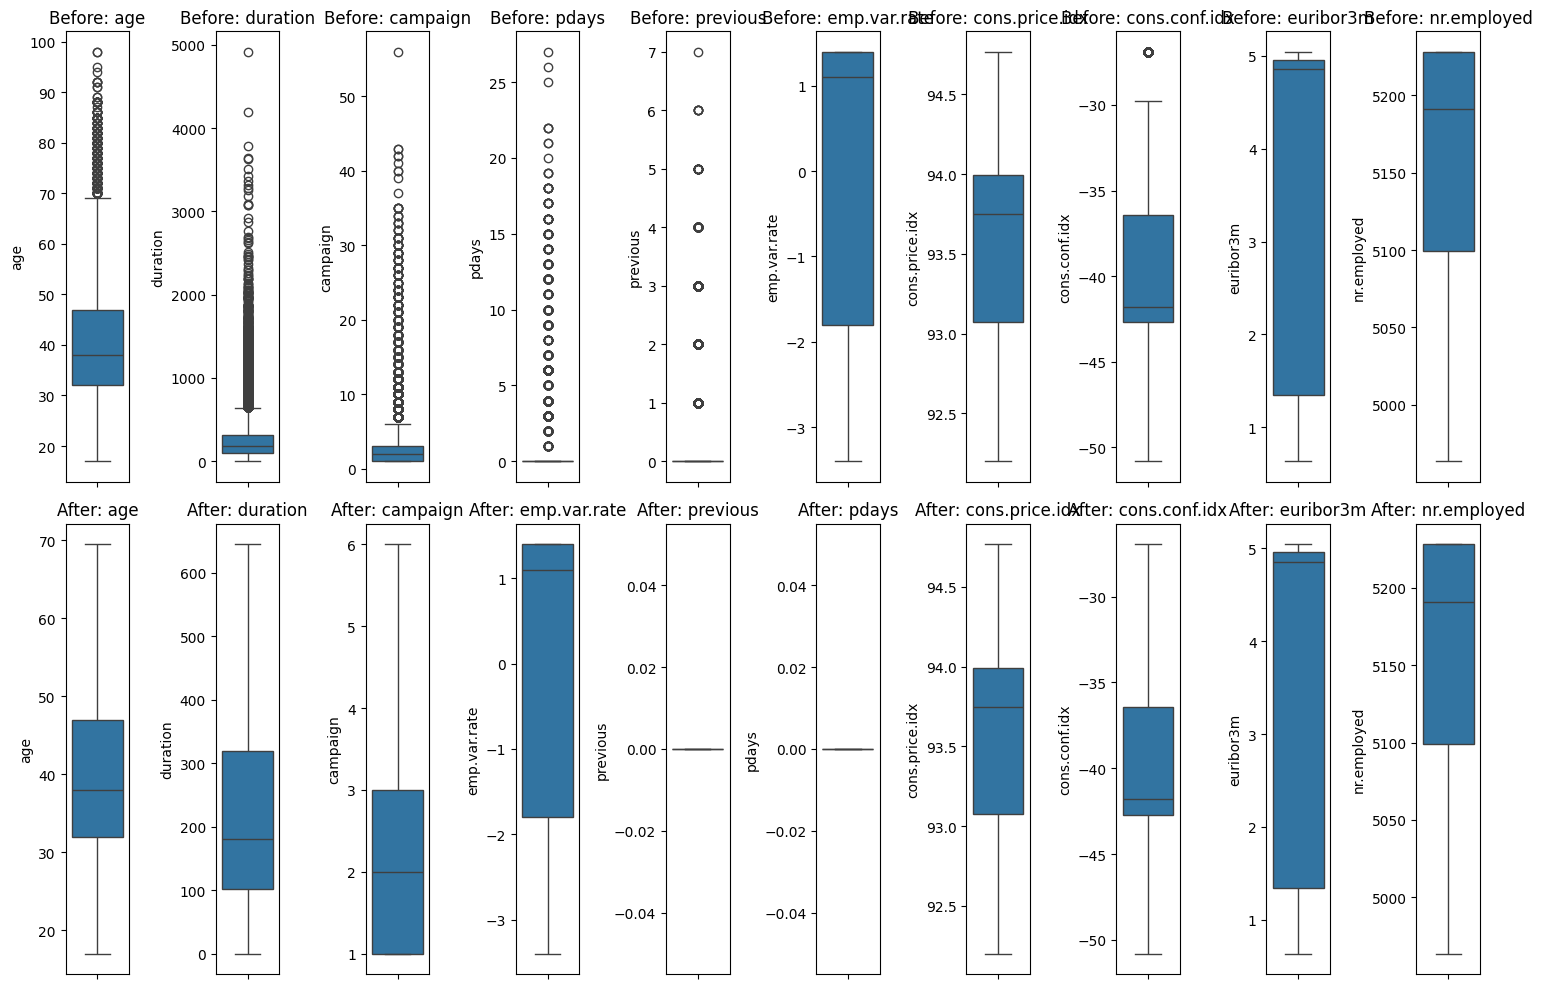

In [18]:
# Create subplots for the box plots before and after outlier handling
fig, axes = plt.subplots(nrows=2, ncols=len(numerical_columns), figsize=(15, 10))

# Load the cleaned dataset
data_path = os.path.join(google_drive_folder, "processed3_file.csv")
data = pd.read_csv(data_path)

# Plot box plots before outlier handling
for i, column in enumerate(old_numerical_columns):
    sns.boxplot(y=data[column], ax=axes[0, i])
    axes[0, i].set_title(f'Before: {column}')

# Load the cleaned dataset
data_path = os.path.join(google_drive_folder, "processed4_file.csv")
data = pd.read_csv(data_path)

# Plot box plots after outlier handling
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=data[column], ax=axes[1, i])
    axes[1, i].set_title(f'After: {column}')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


**Output Variable Analysis - y**

In [19]:
# Load the cleaned and transformed dataset
data_filtered = pd.read_csv(os.path.join(google_drive_folder, "processed4_file.csv"))

# Count the occurrences of each class in the target variable
class_counts = data_filtered['y'].value_counts()

# Print the class counts
print("Class Counts:")
print(class_counts)

# Calculate the class distribution as percentages
class_distribution = class_counts / class_counts.sum() * 100

# Print the class distribution
print("\nClass Distribution (%):")
print(class_distribution)

Class Counts:
y
0    36548
1     4640
Name: count, dtype: int64

Class Distribution (%):
y
0    88.734583
1    11.265417
Name: count, dtype: float64


**Resampling**

In [20]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

X = data_filtered.drop(columns=['y'])  # Drop the target column to get the features
y = data_filtered['y']  # Target variable

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

**Resampling - Display**

In [21]:
y_resampled_series = pd.Series(y_resampled)

# Print class counts
class_counts = y_resampled_series.value_counts()
print("Class Counts:")
print(class_counts)

# Print class distribution (%)
class_distribution = y_resampled_series.value_counts(normalize=True) * 100
print("\nClass Distribution (%):")
print(class_distribution)

Class Counts:
y
0    36548
1    36548
Name: count, dtype: int64

Class Distribution (%):
y
0    50.0
1    50.0
Name: proportion, dtype: float64


**Resampled Data - Visualization**

In [22]:
# Combine X_resampled and y_resampled into a single DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)  # Assuming X has column names
resampled_data['y'] = y_resampled  # Assuming 'income' is the y column name

# Save the resampled data to a CSV file
output_path = os.path.join(google_drive_folder, "processed5_file.csv")
resampled_data.to_csv(output_path, index=False)

**Scaling and splitting data**

In [27]:
# Load the cleaned and transformed dataset
data_path = os.path.join(google_drive_folder, "processed5_file.csv")
data = pd.read_csv(data_path)

# Define features (X) and target (y)
X = data.drop(columns=['y'])
y = data['y']

# Split the data into training and testing sets (80% train, 20% test)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets (80% train, 20% validation of the train set)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Numerical columns to scale
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Scale numerical features using StandardScaler
scaler = StandardScaler()

# Fit scaler on the training data and transform training, validation, and testing sets
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Check the resulting datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# Save the resampled data to a CSV file
# Save the resampled data to a CSV file
output_path = os.path.join(google_drive_folder, "processed6_file.csv")
data.to_csv(output_path, index=False)

Training set shape: (46780, 20), (46780,)
Validation set shape: (11696, 20), (11696,)
Testing set shape: (14620, 20), (14620,)


**Random Forest Classifier**

In [28]:
# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
rf_val_predictions = rf_classifier.predict(X_val)

# Evaluate Random Forest on the validation set
print("\nRandom Forest Classifier (Validation Set):")
print("Accuracy on Validation Set:", accuracy_score(y_val, rf_val_predictions))
print("Classification Report on Validation Set:")
print(classification_report(y_val, rf_val_predictions))

# Evaluate Random Forest on the test set
rf_test_predictions = rf_classifier.predict(X_test)
print("\nRandom Forest (Test Set):")
print("Accuracy on Test Set:", accuracy_score(y_test, rf_test_predictions))
print("Classification Report on Test Set:")
print(classification_report(y_test, rf_test_predictions))


Random Forest Classifier (Validation Set):
Accuracy on Validation Set: 0.9466484268125855
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      5831
           1       0.93      0.97      0.95      5865

    accuracy                           0.95     11696
   macro avg       0.95      0.95      0.95     11696
weighted avg       0.95      0.95      0.95     11696


Random Forest (Test Set):
Accuracy on Test Set: 0.9471272229822162
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      7317
           1       0.93      0.97      0.95      7303

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



**Neural Network**

Epoch 1/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8469 - loss: 0.3484 - val_accuracy: 0.8985 - val_loss: 0.2611
Epoch 2/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8974 - loss: 0.2539 - val_accuracy: 0.9026 - val_loss: 0.2450
Epoch 3/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9012 - loss: 0.2434 - val_accuracy: 0.9083 - val_loss: 0.2336
Epoch 4/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9079 - loss: 0.2301 - val_accuracy: 0.9044 - val_loss: 0.2364
Epoch 5/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9064 - loss: 0.2304 - val_accuracy: 0.9072 - val_loss: 0.2359
Epoch 6/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9095 - loss: 0.2230 - val_accuracy: 0.9112 - val_loss: 0.2252
Epoch 7/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9112 - loss: 0.2218 - val_accuracy: 0.9103 - val_loss: 0.2265
Epoch 8/100
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9150 - loss: 0

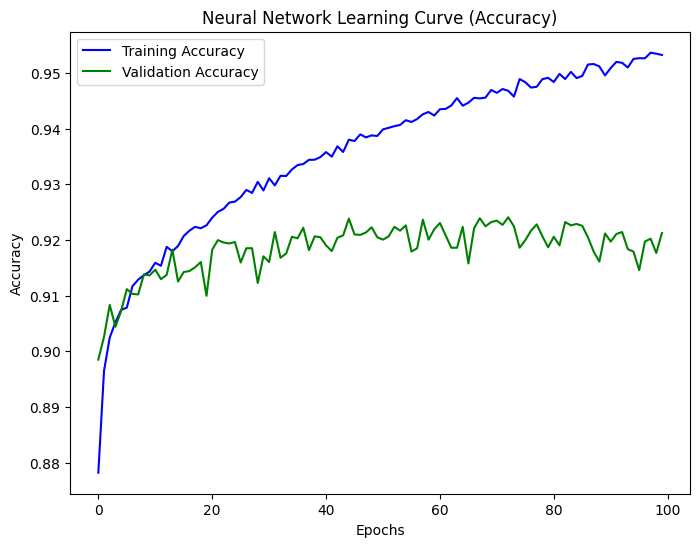

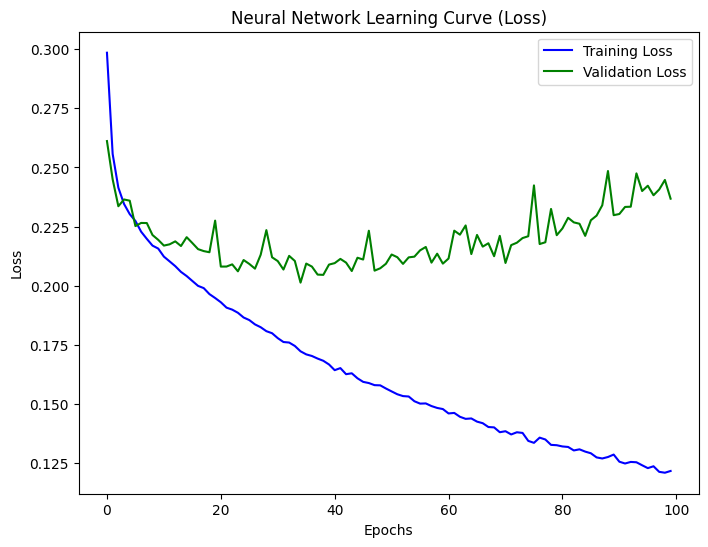

457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9198 - loss: 0.2466

Test Accuracy: 0.9207
Test Loss: 0.2467
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Neural Network (TensorFlow) on Validation Set:
Accuracy on Validation Set: 0.9212551299589603
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5831
           1       0.91      0.93      0.92      5865

    accuracy                           0.92     11696
   macro avg       0.92      0.92      0.92     11696
weighted avg       0.92      0.92      0.92     11696


Neural Network (TensorFlow) on Test Set:
Test Accuracy: 0.9207250341997264
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7317
           1       0.91      0.93      0.92      7303

    accuracy                           0.92     14620
   macro a

In [29]:
# Build the Neural Network model using TensorFlow
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    tf.keras.layers.Dense(50, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and track the history of accuracy and loss
history = nn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Neural Network Learning Curve (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Neural Network Learning Curve (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generate predictions for test set
nn_test_predictions = nn_model.predict(X_test)
nn_test_predictions = (nn_test_predictions > 0.5).astype("int32")  #Converting probabilities to binary predictions

# Generate predictions for validation set
nn_val_predictions = nn_model.predict(X_val)
nn_val_predictions = (nn_val_predictions > 0.5).astype("int32")  #Converting probabilities to binary predictions

# Evaluate Neural Network on the validation set
print("\nNeural Network (TensorFlow) on Validation Set:")
print("Accuracy on Validation Set:", accuracy_score(y_val, nn_val_predictions))
print("Classification Report on Validation Set:")
print(classification_report(y_val, nn_val_predictions))

# Evaluate Neural Network on the test set
print("\nNeural Network (TensorFlow) on Test Set:")
print("Test Accuracy:", accuracy_score(y_test, nn_test_predictions))
print("Classification Report on Test Set:")
print(classification_report(y_test, nn_test_predictions))


**Model Comparison - Accuracy and F1 score**

                         Model  Accuracy  F1 Score
0   Random Forest (Validation)  0.946648  0.947774
1         Random Forest (Test)  0.947127  0.948069
2  Neural Network (Validation)  0.921255  0.922442
3        Neural Network (Test)  0.920725  0.921694


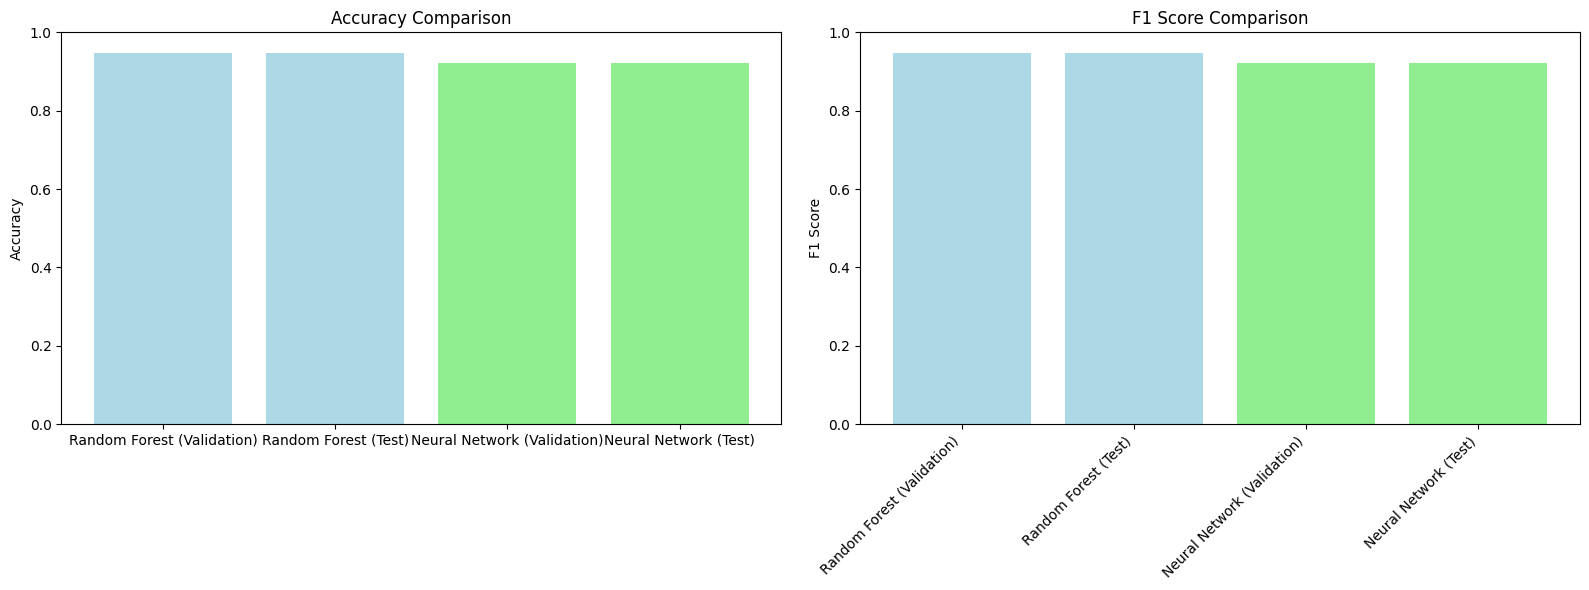

In [30]:
# Create a DataFrame to store the results for both models
comparison_data = {
    'Model': ['Random Forest (Validation)', 'Random Forest (Test)', 'Neural Network (Validation)', 'Neural Network (Test)'],
    'Accuracy': [
        accuracy_score(y_val, rf_val_predictions),
        accuracy_score(y_test, rf_test_predictions),
        accuracy_score(y_val, nn_val_predictions),
        accuracy_score(y_test, nn_test_predictions)
    ],
    'F1 Score': [
        classification_report(y_val, rf_val_predictions, output_dict=True)['1']['f1-score'],
        classification_report(y_test, rf_test_predictions, output_dict=True)['1']['f1-score'],
        classification_report(y_val, nn_val_predictions, output_dict=True)['1']['f1-score'],
        classification_report(y_test, nn_test_predictions, output_dict=True)['1']['f1-score']
    ]
}

# Convert the dictionary into a pandas DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Print the comparison table
print(comparison_df)

# Plot the results for visual comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy comparison
axes[0].bar(comparison_df['Model'], comparison_df['Accuracy'], color=['lightblue', 'lightblue', 'lightgreen', 'lightgreen'])
axes[0].set_title('Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')

# F1 Score comparison
axes[1].bar(comparison_df['Model'], comparison_df['F1 Score'], color=['lightblue', 'lightblue', 'lightgreen', 'lightgreen'])
axes[1].set_title('F1 Score Comparison')
axes[1].set_ylabel('F1 Score')
axes[1].set_ylim(0, 1)

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plots
plt.tight_layout()
plt.show()


**Training Accuracy**

In [31]:
# Random Forest Classifier Predictions (already binary)
rf_train_predictions = rf_classifier.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
print("Random Forest Training Accuracy:", rf_train_accuracy)

# Neural Network Predictions (convert probabilities to binary)
nn_train_predictions = nn_model.predict(X_train)
nn_train_predictions = (nn_train_predictions > 0.5).astype("int32")  # Threshold at 0.5
nn_train_accuracy = accuracy_score(y_train, nn_train_predictions)
print("Neural Network Training Accuracy:", nn_train_accuracy)

Random Forest Training Accuracy: 0.9999786233433091
1462/1462 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Neural Network Training Accuracy: 0.958230012825994


**Confusion Matrix**

457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Confusion Matrix for Random Forest Classifier:


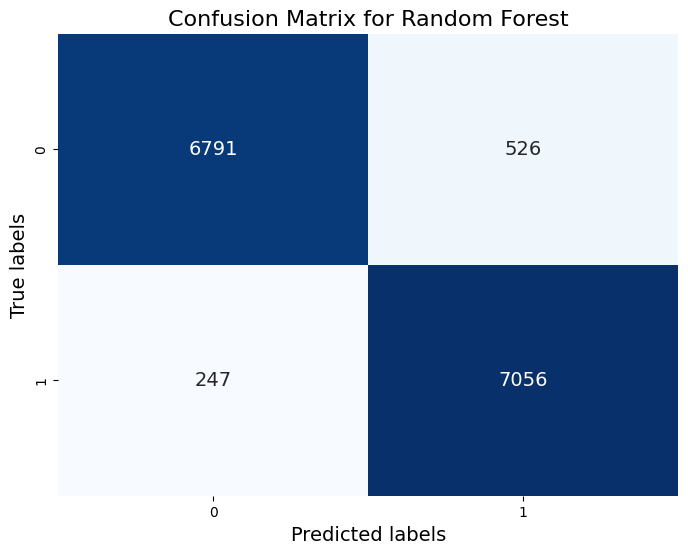


Confusion Matrix for Neural Network Classifier:


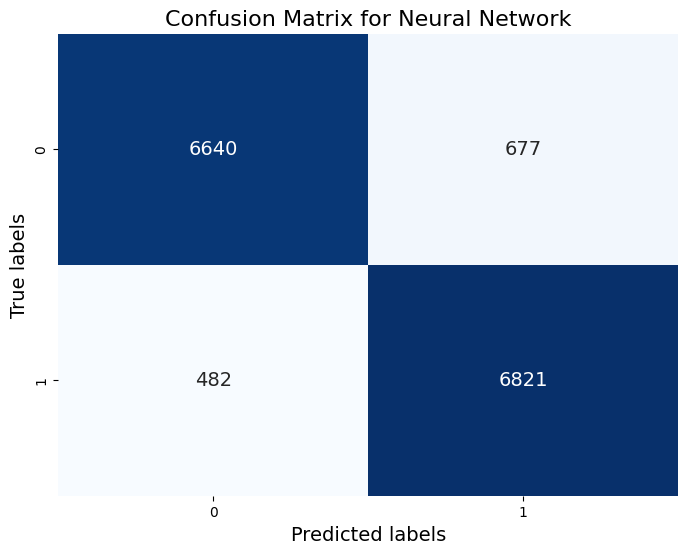

In [32]:
# Use the test set (X_test) for predictions
rf_predictions = rf_classifier.predict(X_test)

# Convert Neural Network probabilities to binary predictions
nn_predictions = nn_model.predict(X_test)
nn_predictions = (nn_predictions > 0.5).astype("int32")  # Apply threshold

# Print Confusion Matrix for Random Forest Classifier
print("\nConfusion Matrix for Random Forest Classifier:")
cm_rf = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix for Random Forest', fontsize=16)
plt.show()

# Print Confusion Matrix for Neural Network Classifier
print("\nConfusion Matrix for Neural Network Classifier:")
cm_nn = confusion_matrix(y_test, nn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix for Neural Network', fontsize=16)
plt.show()

**ROC curve**

457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


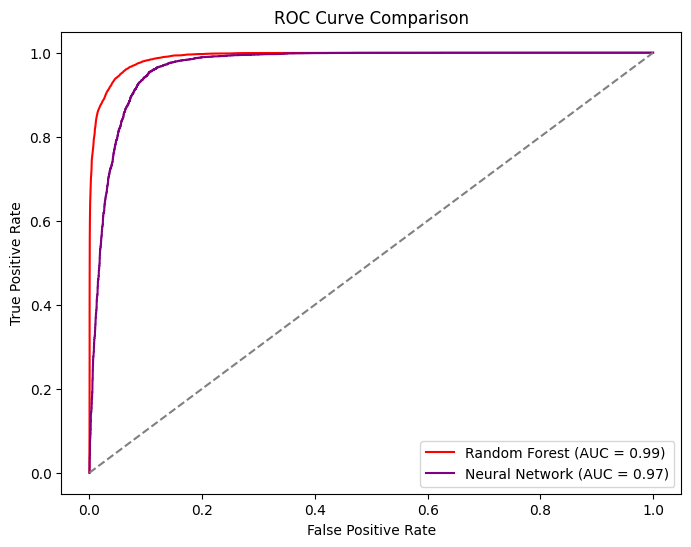

In [33]:
# Get predicted probabilities for the positive class
rf_probabilities = rf_classifier.predict_proba(X_test)[:, 1]  # For RandomForest, probability of the positive class
nn_probabilities = nn_model.predict(X_test).flatten()  # Neural Network: probabilities for the positive class

# Compute ROC curve for both models
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probabilities)

# Compute AUC
rf_auc = auc(rf_fpr, rf_tpr)
nn_auc = auc(nn_fpr, nn_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='red', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, color='purple', label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


**Precision-recall curve**

457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


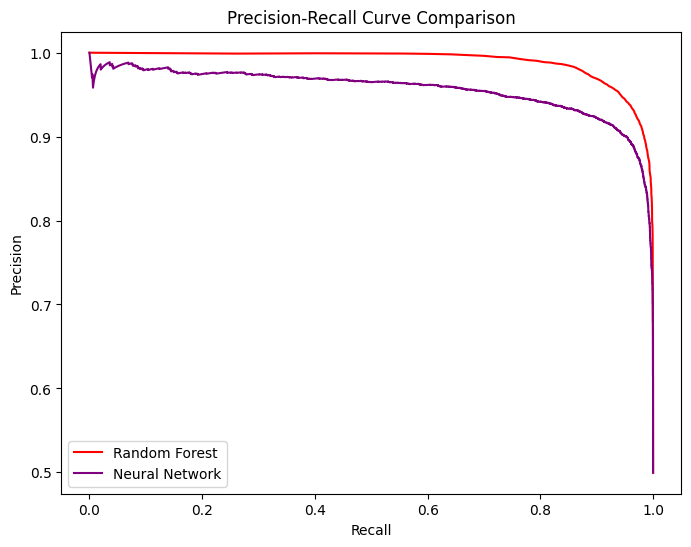

In [34]:
# Get predicted probabilities for the positive class
rf_probabilities = rf_classifier.predict_proba(X_test)[:, 1]  # Random Forest: probabilities for the positive class
nn_probabilities = nn_model.predict(X_test).flatten()  # Neural Network: probabilities for the positive class

# Compute precision-recall curve for both models
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probabilities)
nn_precision, nn_recall, _ = precision_recall_curve(y_test, nn_probabilities)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(rf_recall, rf_precision, color='red', label='Random Forest')
plt.plot(nn_recall, nn_precision, color='purple', label='Neural Network')
plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


# **GUI for real time predictions**

In [35]:
# Simulate feature names and the trained RandomForestClassifier
feature_names = [
    "age", "job", "marital", "education", "default", "housing", "loan", "contact",
    "month", "day_of_week", "duration", "campaign", "pdays", "previous", "poutcome",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"
    ]

# Create input widgets for features
input_widgets = {feature: widgets.FloatText(description=feature, value=0.0) for feature in feature_names}

# Button to trigger prediction
predict_button = widgets.Button(description="Predict")
output = widgets.Output()

# Function to handle prediction
def predict_button_clicked(b):
    with output:
        clear_output()  # Clear previous output
        try:
            # Gather inputs
            input_values = np.array([widget.value for widget in input_widgets.values()]).reshape(1, -1)
            # Perform prediction
            predicted_y = rf_classifier.predict(input_values)[0]
            if (predicted_y)==0:
                display(f"Predicted value for y: no")
            else:
                display(f"Predicted value for y: yes")
        except Exception as e:
            display(f"Error: {e}")

# Attach function to button click
predict_button.on_click(predict_button_clicked)

# Display the widgets and output
display(widgets.VBox(list(input_widgets.values()) + [predict_button, output]))